In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [425]:
spy=pd.read_csv("data/spy.csv")

In [426]:
spy.rename(columns={'Adj Close':"adj_close"}, inplace=True)

In [427]:
spy.tail()

,Date,Open,High,Low,Close,adj_close,Volume
3771,2020-03-19,239.250000,247.380005,232.220001,240.509995,239.103989,289322000
3772,2020-03-20,242.529999,244.470001,228.500000,228.800003,228.800003,347158800
3773,2020-03-23,228.190002,229.679993,218.259995,222.949997,222.949997,326025200
3774,2020-03-24,234.419998,244.100006,233.800003,243.149994,243.149994,235494500
3775,2020-03-25,244.869995,256.350006,239.750000,246.789993,246.789993,298352300


In [428]:
spy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3776 entries, 0 to 3775
Data columns (total 7 columns):
Date         3776 non-null object
Open         3776 non-null float64
High         3776 non-null float64
Low          3776 non-null float64
Close        3776 non-null float64
adj_close    3776 non-null float64
Volume       3776 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 206.6+ KB


In [429]:
spy=spy.astype({'Date': 'datetime64'})

In [430]:
dspy=spy.set_index('Date')

In [431]:
spy.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,3776.0,1.748180e+02,6.216607e+01,6.795000e+01,1.269200e+02,1.503050e+02,2.120350e+02,3.377900e+02
High,3776.0,1.757552e+02,6.230755e+01,7.000000e+01,1.275975e+02,1.511750e+02,2.126250e+02,3.390800e+02
Low,3776.0,1.737865e+02,6.200655e+01,6.710000e+01,1.261250e+02,1.491800e+02,2.112475e+02,3.374800e+02
Close,3776.0,1.748298e+02,6.217226e+01,6.811000e+01,1.268275e+02,1.501600e+02,2.122325e+02,3.383400e+02
adj_close,3776.0,1.547432e+02,6.838621e+01,5.418443e+01,9.877749e+01,1.213159e+02,1.946259e+02,3.363621e+02
Volume,3776.0,1.416417e+08,9.886380e+07,1.527000e+07,7.272658e+07,1.115036e+08,1.778020e+08,8.710263e+08


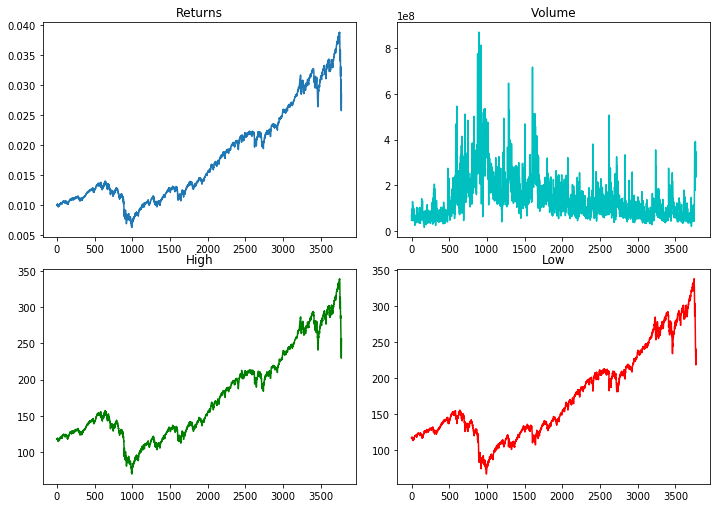

In [46]:
fig, ax = plt.subplots(2,2, figsize=(10,7))
fig.tight_layout()
ax[0][1].plot(spy.Volume, color='c')
ax[0][1].set_title("Volume");

ax[0][0].plot(spy.adj_close/spy.adj_close[0]/100);
ax[0][0].set_title("Returns");

ax[1][1].plot(spy.Low, color='r')
ax[1][1].set_title("Low");

ax[1][0].plot(spy.High, color='g')
ax[1][0].set_title("High");

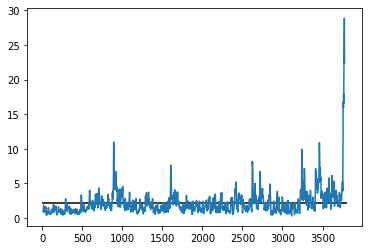

In [19]:
plt.plot(spy.Close.rolling(14).std())
plt.hlines(np.mean(spy.Close.rolling(14).std()),0,3800)

In [28]:
def RSI(series, period=14):
 print(len(series))
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False) / pd.stats.moments.ewma(d, com=period-1, adjust=False)
 rs = pd.Series.ewm(u, com=period-1).mean()/pd.Series.ewm(d, com=period-1).mean()
 return 100 - 100 / (1 + rs)

In [42]:
#spy.Close.rolling(14).apply(RSI, raw=False)
#Graph
#min max, %s 
#fit 14 vs 10
#backtested profitability
np.sum(np.where(RSI(spy.adj_close) <30,1,0))

3776


69

In [57]:
rsi=RSI(spy.adj_close).dropna();

3776


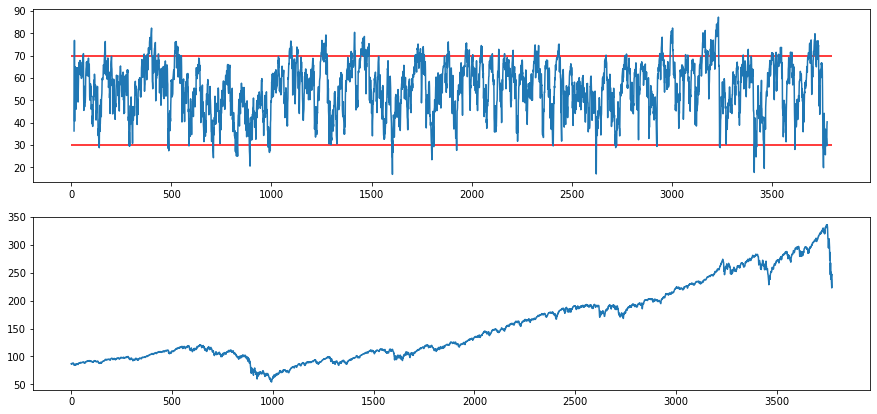

In [60]:
fig, ax= plt.subplots(2,1, figsize=(15,7))
ax[0].plot(rsi)
ax[0].hlines(70,0,3800, color='red')
ax[0].hlines(30,0,3800, color='red')
ax[1].plot(spy.adj_close);

In [72]:
print("Min RSI", np.min(rsi))
print("Max RSI", np.max(rsi))
print("Median RSI", np.median(rsi))
print("Std dev. RSI", np.std(rsi))
print("% of time below 20", np.round(100*np.sum(np.where(rsi<20,1,0))/len(rsi),2))
print("% of time below 30", np.round(100*np.sum(np.where(rsi<30,1,0))/len(rsi),2))
print("% of time above 70", np.round(100*np.sum(np.where(rsi>70,1,0))/len(rsi),2))
print("% of time above 80", np.round(100*np.sum(np.where(rsi>80,1,0))/len(rsi),2))

Min RSI 16.80273123264722
Max RSI 87.19183653342725
Median RSI 56.734013828313536
Std dev. RSI 11.515620141280829
% of time below 20 0.16
% of time below 30 1.83
% of time above 70 8.9
% of time above 80 0.53


In [75]:
rsi.describe()

count    3762.000000
mean       55.500167
std        11.517151
min        16.802731
25%        47.272503
50%        56.734014
75%        64.201823
max        87.191837
Name: adj_close, dtype: float64

In [450]:
macd=spy.adj_close.ewm(span=12,min_periods=0,adjust=True,ignore_na=True).mean()-spy.adj_close.ewm(span=26,min_periods=0,adjust=True,ignore_na=True).mean()

In [451]:
signal=macd.ewm(span=12,min_periods=0,adjust=True,ignore_na=True).mean()
macd_hist=macd-signal

In [452]:
macd_hist.describe()

count    3776.000000
mean       -0.026367
std         0.692608
min        -7.631611
25%        -0.278969
50%         0.013916
75%         0.304390
max         2.659850
Name: adj_close, dtype: float64

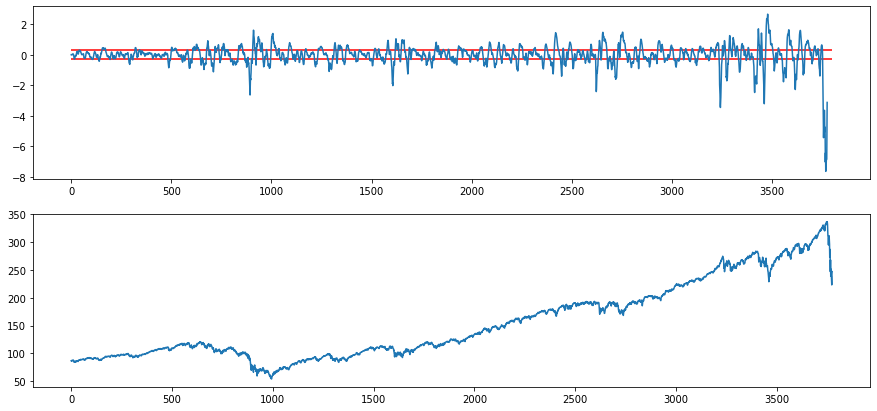

In [435]:
fig, ax= plt.subplots(2,1, figsize=(15,7))
ax[0].plot(macd_hist)
ax[0].hlines(np.percentile(macd_hist,75),0,3800, color='red')
ax[0].hlines(np.percentile(macd_hist,25),0,3800, color='red')
ax[1].plot(spy.adj_close);

In [453]:
spy['macd']=macd_hist

In [454]:
dspy['macd']=macd_hist

In [437]:
def calcs(x):
    print(x)
    return 0

In [438]:
spy.macd[0]=-1

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [467]:
results=pd.DataFrame(columns=['start_date','end_date','entry_price','exit_price','is_long'])

In [468]:
def sign_change(x):
    if np.sign(x[0]) == np.sign(x[1]):
        return False
    return True

In [466]:
#On sign change.
has_position=False
position_start_index=-1
position_end_index=-1
last=0
is_long=False
for index, row in spy.iterrows():
    if  index == 0:
        last=row.macd
        continue
    if sign_change([last,row.macd]):
        #print(index)
        if has_position:
            has_position=False #Uncommented for long only
            #print(last, row.macd, index)
            results=results.append({'start_date':spy.loc[position_start_index,'Date'],'end_date':spy.loc[index,'Date'],'entry_price':spy.loc[position_start_index,'adj_close'],'exit_price':spy.loc[index,'adj_close'],'is_long':is_long}, ignore_index=True)
            if has_position:
                position_start_index=index
                if row.macd>0:
                    is_long=True
                else:
                    is_long=False
        
        else:
            has_position=True
            position_start_index=index
            if row.macd>0:
                is_long=True
            else:
                is_long=False
            
                           
    last=row.macd                 

In [469]:
#On sign change buy and below -x sell:
has_position=False
position_start_index=-1
position_end_index=-1
last=0
is_long=False
for index, row in spy.iterrows():
    if  index == 0:
        last=row.macd
        continue
    if has_position and row.macd<=-0.2:
        #print(index)
        #if has_position:
            has_position=False #Uncommented for long only
            #print(last, row.macd, index)
            results=results.append({'start_date':spy.loc[position_start_index,'Date'],'end_date':spy.loc[index,'Date'],'entry_price':spy.loc[position_start_index,'adj_close'],'exit_price':spy.loc[index,'adj_close'],'is_long':is_long}, ignore_index=True)
            
    elif last<0 and row.macd>=0:
            has_position=True
            position_start_index=index
            if row.macd>0:
                is_long=True
            else:
                is_long=False
            
                           
    last=row.macd                 

In [470]:
def calc_returns(x):
    if x.is_long==True:
        return np.round(100*(x.exit_price/x.entry_price-1),2)
    return -1*np.round(100*(x.exit_price/x.entry_price-1),2)

In [471]:
#results['returns']=np.round(100*(results.exit_price/results.entry_price-1),2)
results['returns']=results.apply(calc_returns, axis=1)

In [472]:
results.sort_values(by='returns', ascending=False)
#results

,start_date,end_date,entry_price,exit_price,is_long,returns
91,2019-01-04,2019-03-05,246.251556,272.233887,True,10.55
70,2016-02-16,2016-04-07,174.500122,188.496506,True,8.02
29,2010-02-17,2010-04-27,89.747200,96.835060,True,7.90
38,2011-10-07,2011-11-16,97.428963,104.476593,True,7.23
68,2015-10-02,2015-11-11,178.239105,189.884064,True,6.53
...,...,...,...,...,...,...
37,2011-08-25,2011-10-03,97.404976,92.562164,True,-4.97
30,2010-06-10,2010-06-30,89.209557,84.764252,True,-4.98
16,2008-01-31,2008-03-07,106.715118,100.764511,True,-5.58
21,2009-02-06,2009-02-18,69.196304,62.871731,True,-9.14


In [473]:
results.returns.describe()

count    100.000000
mean      -0.436600
std        3.828935
min      -18.940000
25%       -2.600000
50%       -0.965000
75%        1.355000
max       10.550000
Name: returns, dtype: float64

In [474]:
value_trend=[1000]
for r in results.returns:
    value_trend.append(value_trend[-1]*(1+r/100))

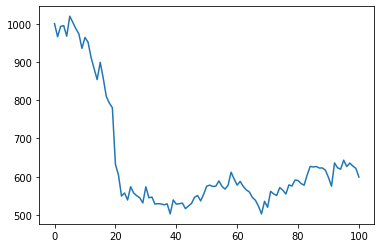

In [475]:
plt.plot(value_trend)

In [476]:
print(f'Returns (%) :', np.round(100*(value_trend[-1]/value_trend[0]-1)))
print(f'SPY returns (%) :', np.round(100*(spy.adj_close[-1:]/spy.adj_close[0]-1)))

Returns (%) : -40.0
SPY returns (%) : 3775    185.0
Name: adj_close, dtype: float64


In [512]:
spy['std']=spy.Close.rolling(22).apply(np.std, raw=False)

In [483]:
spy=spy.set_index('Date')

In [463]:
spy.reset_index(inplace=True)

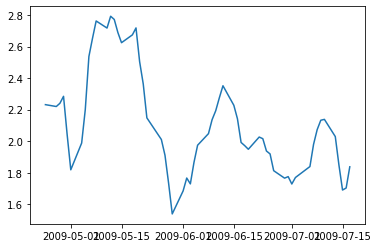

In [513]:
plt.plot(spy.loc['2009-04-24':'2009-07-18']['std']);

#price drop, macd hist trough, macd level itself, vol, instead of AMCS signal cycle maybe holding cycle with <-0.3
There will be bad signals, have to make yourown determination
is down x% is what percentile of all x days, maybe VaR*
Not trade high vol situations
does it always cycle down
can repeat with weekly & sto but maybe have to rely on *
pressure release, mean reversion need of the process

so looks like forget predictor, there is not even a good descriptor for quick changes. 
Maybe use vol to describe market, explore shorter MAs for high vol. 
A lot if your skill and estimation.
sentiment maybe something from an unbiased or differentiated source 
stay long buy protection


In [499]:
spy['std']=spy.adj_close.rolling(14).std(ddof=0)

In [500]:
spy

,Open,High,Low,Close,adj_close,Volume,macd,std
Date,,,,,,,,
2005-03-28,117.419998,117.940002,117.309998,117.309998,86.672218,46765500,0.000000,NaN
2005-03-29,117.139999,117.900002,116.250000,116.529999,86.095924,71160300,-0.005926,NaN
2005-03-30,116.779999,118.199997,116.769997,118.180000,87.315025,62002100,0.017275,NaN
2005-03-31,118.190002,118.459999,117.870003,117.959999,87.152466,64575400,0.018111,NaN
2005-04-01,118.629997,118.989998,116.910004,117.430000,86.760864,95255300,0.005010,NaN
...,...,...,...,...,...,...,...,...
2020-03-19,239.250000,247.380005,232.220001,240.509995,239.103989,289322000,-6.861454,25.992921
2020-03-20,242.529999,244.470001,228.500000,228.800003,228.800003,347158800,-6.864667,26.532383
2020-03-23,228.190002,229.679993,218.259995,222.949997,222.949997,326025200,-6.818389,27.402832


In [502]:
np.mean(spy['std'].dropna().values)

1.8671597486933187